In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [9]:
# Set up visualization style
sns.set_style("whitegrid")

# Load all CSV files into a single DataFrame
csv_files = glob.glob("stations/station_*.csv")  # Reads all station CSVs
dfs = [pd.read_csv(file) for file in csv_files]

# Combine all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)
df_5 = pd.concat([pd.read_csv(file) for file in csv_files[-5:]], ignore_index=True) # only 5 files for plotting values, since it takes forever

# Convert 'date' to datetime format
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df_5["date"] = pd.to_datetime(df_5["date"], format="%d.%m.%Y")

numeric_cols = ["min_temp", "max_temp", "avg_temp", "atm_pressure", "wind_speed", "downfall", "eff_temp"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
df_5[numeric_cols] = df_5[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Drop any rows with missing values (there's a lot of such rows... this will need to be dealt with later.)
# df.dropna(inplace=True)

# Display first few rows
df.head()

,date,min_temp,max_temp,avg_temp,atm_pressure,wind_speed,downfall,eff_temp
0,2014-01-01,0.0,-3.0,-1.5,NaN,6.0,0.0,-7.6
1,2014-01-02,-1.0,-5.0,-3.2,NaN,6.0,0.0,-9.3
2,2014-01-03,-3.0,-8.0,-4.9,NaN,4.0,0.0,-9.9
3,2014-01-04,-5.0,-15.0,-8.9,NaN,3.0,NaN,-13.5
4,2014-01-05,-16.0,-23.0,-19.6,NaN,4.0,NaN,-25.5


In [14]:
df_5["year"] = df_5["date"].dt.year
nan_counts = df_5.groupby("year").apply(lambda x: x.isna().sum())

# Display table of NaNs
print("\nMissing Values Per Year:\n")
print(nan_counts)


Missing Values Per Year:

      date  min_temp  max_temp  avg_temp  atm_pressure  wind_speed  downfall  \
year                                                                           
2014     0         0         0         0             0           1       198   
2015     0         0         0         0             0          12        12   
2016     0         0         0         0             5          18         3   
2017     0         0         0         0             0           8         2   
2018     0         0         0         0             0          28         2   
2019     0         0         0         0             0          12         5   
2020     0         0         0         0             3           6         1   
2021     0         0         0         0            21          43         2   
2022     0         0         0         0             0           4         1   
2023     0         0         0         0             0           0         2   
2024     0   

C:\Users\user\AppData\Local\Temp\ipykernel_22652\2193927777.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts = df_5.groupby("year").apply(lambda x: x.isna().sum())


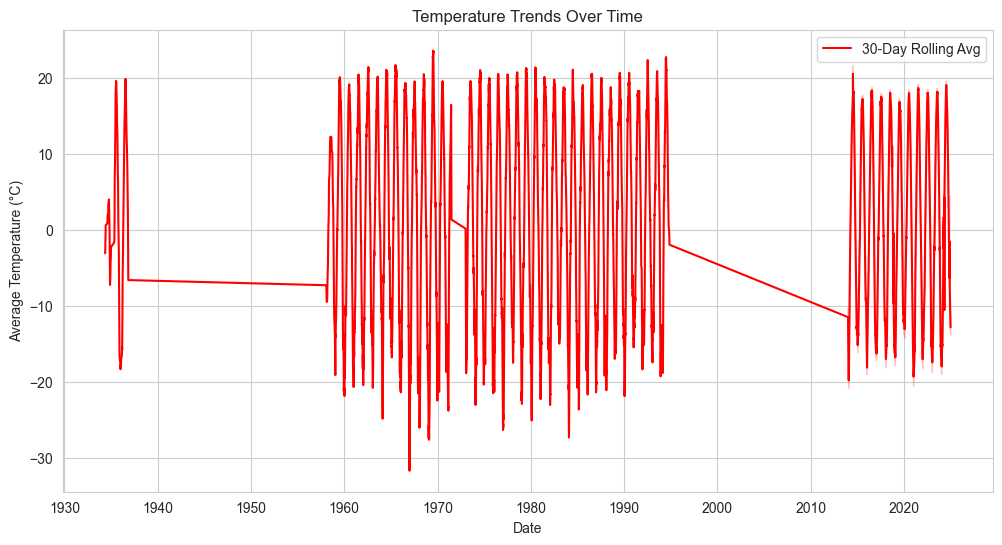

In [16]:
# 1. Temperature Trends Over Time
df["year"] = df["date"].dt.year

plt.figure(figsize=(12, 6))

# Rolling average (30-day window)
df["avg_temp_smooth"] = df["avg_temp"].rolling(30, center=True).mean()
sns.lineplot(x=df["date"], y=df["avg_temp_smooth"], label="30-Day Rolling Avg", color="red")

# Raw data (transparent for reference)
#sns.scatterplot(x=df["date"], y=df["avg_temp"], alpha=0.2, color="gray", label="Raw Data")

plt.title("Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.show()

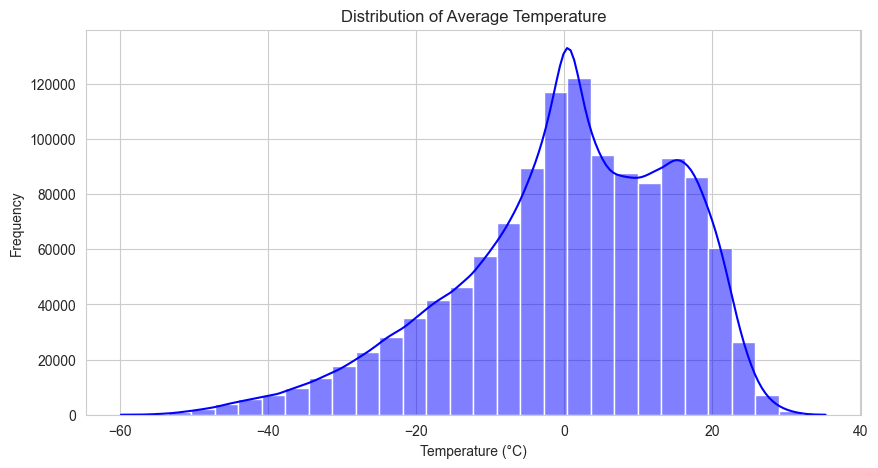

In [7]:
# 2. Histogram of Average Temperature
plt.figure(figsize=(10, 5))
sns.histplot(df["avg_temp"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Temperature")
plt.show()

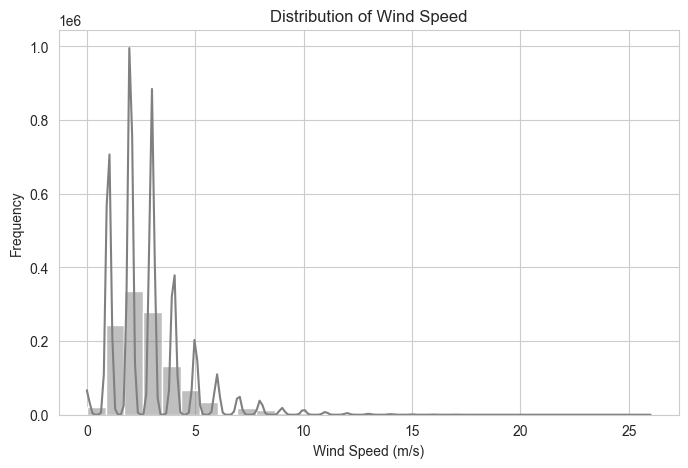

In [11]:
# 3. Box Plot for Wind Speed
plt.figure(figsize=(8, 5))
sns.histplot(df["wind_speed"], bins=30, kde=True, color="gray")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.title("Distribution of Wind Speed")
plt.show()